In [2]:
from data_retrieval import fetch_uci_data

# ID number for heart disease dataset
df = fetch_uci_data(45)

Variable Information
--------------------
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                No

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
duplicated_rows = df[df.duplicated()]

duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [6]:
def transform_categorical(df, categorical_vars):
    """ 
    Transform column into categorical variable 

    Parameters
    ----------
    df: df
        Dataframe containing columns to be transformed

    categorical_var: list
        List of column names to be transformed

    Returns
    df_copy: df
        Dataframe with transformed columns
    """ 
    df_copy = df.copy()

    for var in categorical_vars:
        df_copy[var] = df_copy[var].astype('category')
    
    return df_copy

In [7]:
categorical_vars = ['sex', 'cp', 'fbs', 'exang', 'slope', 'thal', 'restecg', 'num']

df = transform_categorical(df, categorical_vars)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  num       303 non-null    category
dtypes: category(8), float64(2), int64(4)
memory usage: 17.9 KB


In [9]:
import pandas as pd 

def fill_na_with_appropriate_value(df):
    """
    Fill NaNs with the column median for numeric variables and the mode for categorical variables.

    Parameters
    ----------
    df : DataFrame
        DataFrame with NaNs.

    Returns
    -------
    DataFrame
        DataFrame with previous NaNs set to column median for numeric variables and mode for categorical variables.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_filled = df.copy()
    
    for column in df_filled.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df_filled[column]):
            median_value = df_filled[column].median()
            df_filled[column] = df_filled[column].fillna(median_value)
        else:
            # Assuming the column is categorical, fill with the mode
            # The mode could be empty, ensure there's at least one value
            mode_value = df_filled[column].mode()
            if not mode_value.empty:
                df_filled[column] = df_filled[column].fillna(mode_value[0])
    
    return df_filled

In [10]:
df = fill_na_with_appropriate_value(df)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
# Change column names to be more descriptive

df.rename(columns={'trestbps': 'resting_bp', 'thalach':'max_hr', 'ca':'major_vessels', 'oldpeak':'st_segment_depression', 'num':'cd_diag'}, inplace=True)

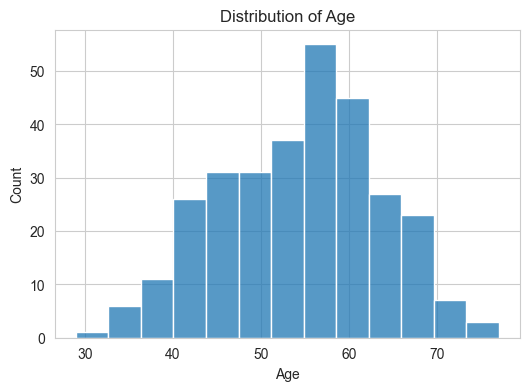

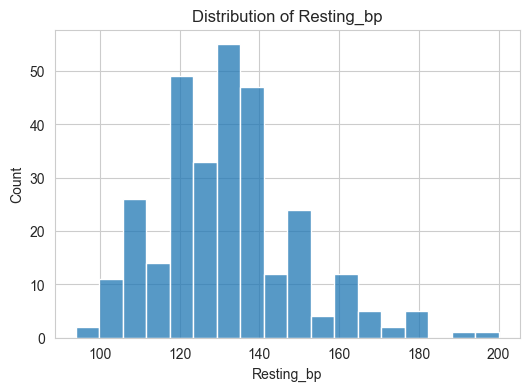

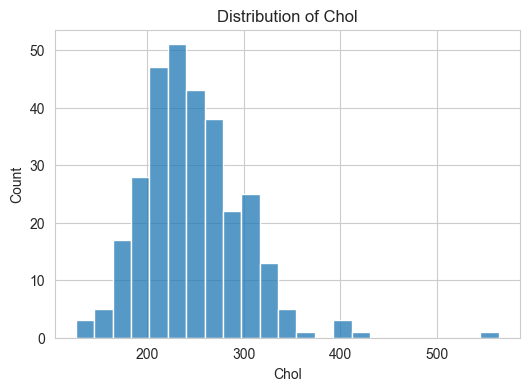

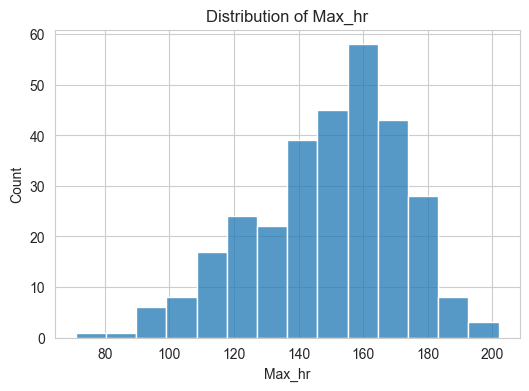

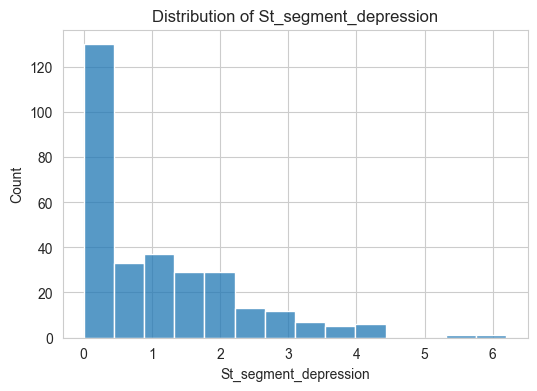

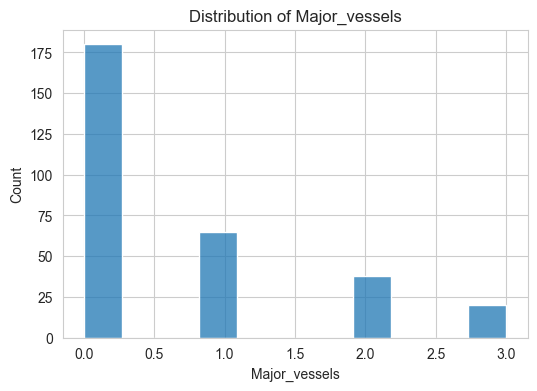

In [13]:
import visualizations as viz 
import seaborn as sns

sns.set_style('whitegrid')

viz.gen_histograms(df)

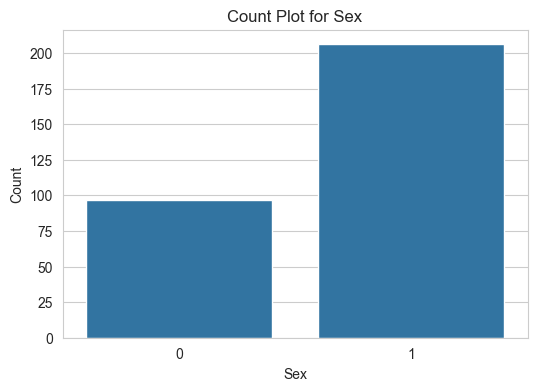

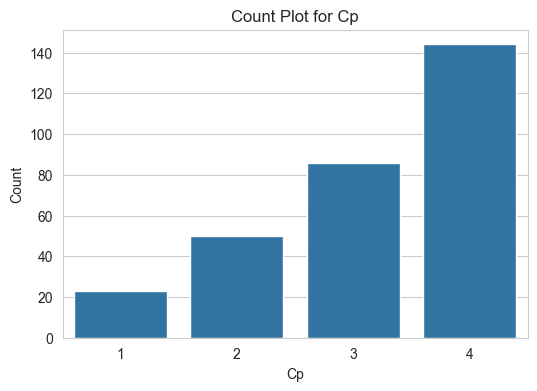

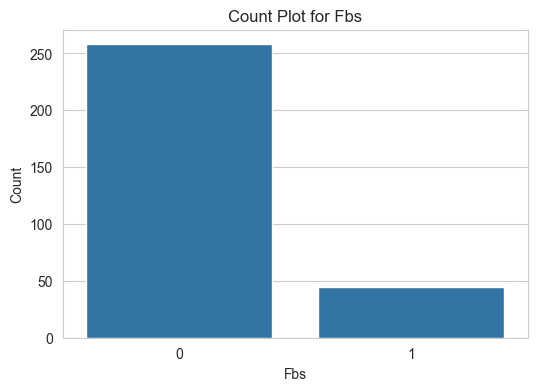

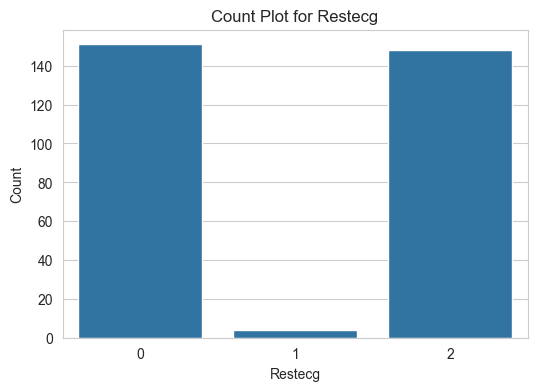

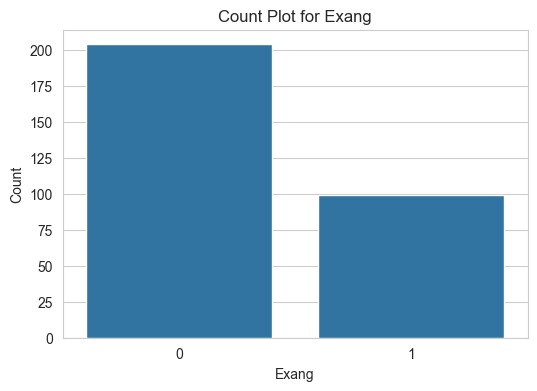

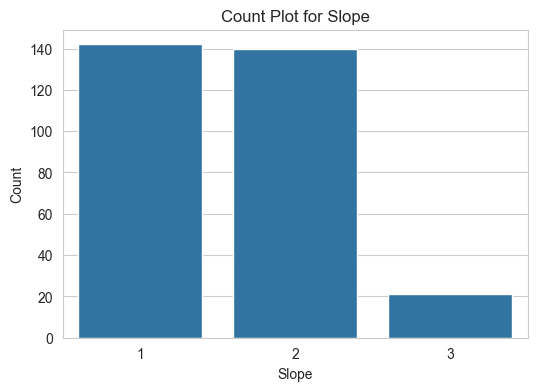

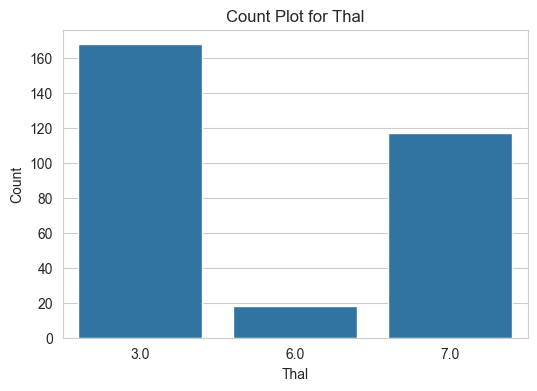

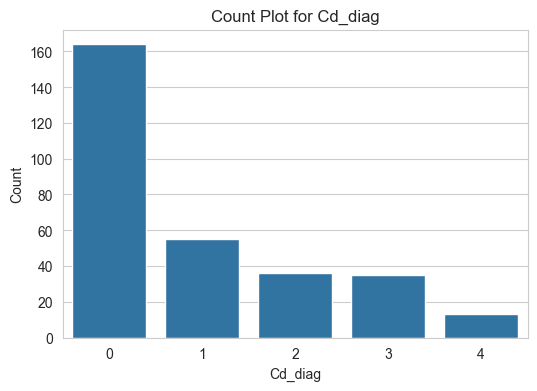

In [14]:
viz.gen_countplots(df)

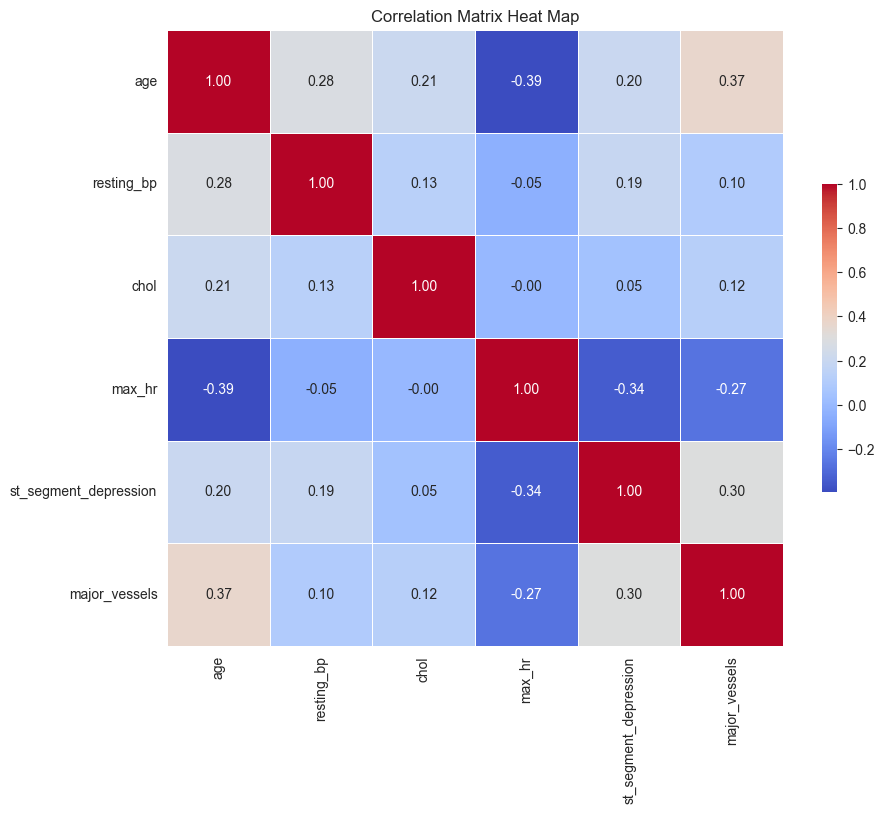

In [15]:
viz.gen_corr_matrix_hmap(df)

## Data Cleaning

In [16]:
# Covert cd_diag column to binary data
df['cd_diag'] = df['cd_diag'].apply(lambda x: 1 if x != 0 else 0)
# Convert cd_diag into categorical data
df['cd_diag'] = df['cd_diag'].astype('category')

In [17]:
import data_cleaning as dc 

# Separate test and train data
X, y = dc.separate_data(df, 'cd_diag')

In [18]:
# Scale numeric variables
X_scaled = dc.scale_data(X)

# Identify the categorical variables
categorical_columns = X.select_dtypes(exclude=['number']).columns

# Encode categorical variables
X_encoded_scaled = pd.get_dummies(X_scaled, columns=categorical_columns)

In [19]:
X_encoded_scaled.head()

,age,resting_bp,chol,max_hr,st_segment_depression,major_vessels,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.711131,False,True,True,False,...,False,True,True,False,False,False,True,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.504881,False,True,False,False,...,False,True,False,True,False,True,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.432877,False,True,False,False,...,False,True,False,True,False,True,False,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.711131,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.711131,True,False,False,True,...,False,True,True,False,True,False,False,True,False,False


In [20]:
import pickle

with open('mydata.pkl', 'wb') as f:
    pickle.dump((X_encoded_scaled, y), f)